# Домашнее задание 2. Визуализация данных.

Вам предлагается визуализировать информацию о различных винах. Данные содержат информацию о

- Стране производства
- Описание вкусовых качеств
- Рейтинг
- Цена
- Имя сомелье
- Вид вина
- и некоторые другие


> Оригинальные данные взяты отсюда https://www.kaggle.com/zynicide/wine-reviews и содержат информацию ~130 000 вин (в том числе премиальных с ценой > 1000$ за бутылку), специально для вас я их почистил и сохранил таблицу содержащую информацию о ~20 000 вин. 

> Я оставил только вина с ценой менее 30$ за бутылку, а так же удалил вина очень редких сортов, редких сомелье, редкие страны, удалил записи с пропусками. Полную информацию о том что я удалил можно найти здесь **clear_data.py**

----

Поскольку мы с вами не учились работать с табличными данными, всю работу связанную с вытаскиванием нужной информации из таблицы я сделаю за вас, а вам останется только **нарисовать и кастомизировать график.**

----

Лекция посвященная визуализации данных хранится вот тут `4.2. Data_vizualization.ipynb` (https://github.com/kurmukovai/hse_culture_viz2019/tree/master/lec-4)

Также рекомендую к просмотру серию уроков по визуализации данных (суммарно около 3-4 часов - 11 коротких уроков)
https://www.youtube.com/watch?v=UO98lJQ3QGI&list=PL-osiE80TeTvipOqomVEeZ1HRrcEvtZB_

---

Приступим.

ps Это домашнее задание нужно сдать до полуночи четверга 24.10.2019 23:59

In [1]:
import pandas as pd # Библиотека для чтения табличных данных
import matplotlib.pyplot as plt # Библиотека для построения графиков
%matplotlib inline
import seaborn as sns

# 1. Загрузим данные

Специально для вас я сохранил данные в формате .xlsx так чтобы вы при желании могли безболезненно открыть эту таблицу в Excel. Для чтения `xlsx` формата в pandas есть специальная функция `read_excel`

In [2]:
data = pd.read_excel('wine-data-20k.xlsx')

In [3]:
# Посмотрим на 5 первых записей в таблице

data.head(5)

,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery
0,France,This has great depth of flavor with its fresh ...,Les Natures,87,27,Alsace,Alsace,Roger Voss,@vossroger,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,Pinot Gris,Jean-Baptiste Adam
1,US,"Soft, supple plum envelopes an oaky structure ...",Mountain Cuvée,87,19,California,Napa Valley,Virginie Boone,@vboone,Kirkland Signature 2011 Mountain Cuvée Caberne...,Cabernet Sauvignon,Kirkland Signature
2,Argentina,"Baked plum, molasses, balsamic vinegar and che...",Felix,87,30,Other,Cafayate,Michael Schachner,@wineschach,Felix Lavaque 2010 Felix Malbec (Cafayate),Malbec,Felix Lavaque
3,Argentina,Raw black-cherry aromas are direct and simple ...,Winemaker Selection,87,13,Mendoza Province,Mendoza,Michael Schachner,@wineschach,Gaucho Andino 2011 Winemaker Selection Malbec ...,Malbec,Gaucho Andino
4,Spain,"Desiccated blackberry, leather, charred wood a...",Vendimia Seleccionada Finca Valdelayegua Singl...,87,28,Northern Spain,Ribera del Duero,Michael Schachner,@wineschach,Pradorey 2010 Vendimia Seleccionada Finca Vald...,Tempranillo Blend,Pradorey


In [4]:
# Посмотрим на названия всех колонок в нашей таблице

data.columns

Index(['country', 'description', 'designation', 'points', 'price', 'province',
       'region_1', 'taster_name', 'taster_twitter_handle', 'title', 'variety',
       'winery'],
      dtype='object')

In [5]:
# Доступ к данным в любой колонке можно получить 2 способами:
# Используя квадртаные скобки и название столбца (как со словарем)

In [6]:
data['country']

0           France
1               US
2        Argentina
3        Argentina
4            Spain
           ...    
22429       France
22430        Spain
22431       France
22432       France
22433       France
Name: country, Length: 22434, dtype: object

In [7]:
# Используя оператор . (точка)

In [8]:
data.country

0           France
1               US
2        Argentina
3        Argentina
4            Spain
           ...    
22429       France
22430        Spain
22431       France
22432       France
22433       France
Name: country, Length: 22434, dtype: object

In [9]:
# Теперь доступ к элементу из этого столбца можно получить по индексу, используя квадратные скобки

data.price

0        27
1        19
2        30
3        13
4        28
         ..
22429    30
22430    17
22431    28
22432    30
22433    21
Name: price, Length: 22434, dtype: int64

In [10]:
data.price[2]

30

In [11]:
data['price'][1]

19

In [12]:
# Старайтесь все время держать в голове что это обычная экселевская таблица

# Список того что мы будем визуализировать

1. Какое распределение вин по цене (сколько вин с ценой выше/ниже 10 долларов за бутылку, выше/ниже 18 долларов за бутылку и т.д.)
2. Какое распределение вин по рейтингу (сколько вин с рейтингов выше/ниже 85, выше/ниже 90)
3. В каких странах (`country`) производят вино
4. В каких странах цена (`price`) на вино в среднем выше
5. В каких странах рейтинг (`points`) вина в среднем выше
6. В каких странах хорошее соотношения цена-рейтинг
7. В какой стране больше всего областей (`province`) производящих вино
8. Сколько сомелье (`taster_name`) в разных странах
---





7. Отличаются ли оценки (рейтинг) которые ставят разные сомелье (может быть какой то сомелье систематически завышает или занижает рейтинг вин)

10. В каких провинциях (`province`) больше всего регионов (`region_1`) производящих вино.  Например в провинции Bordeaux, есть такие регионы как Bordeaux, Blaye Côtes de Bordeaux, Bordeaux Blanc, Bordeaux Rose, в которых производятся разные виды Бордо.
11. Какие сорта вин (`variety`) чаще других производят в каких странах/регионах

# 1. Визуализация цен

Колонка `price`.
Для визуализации цены мы воспользуемся столбчатой диаграммой:
- столбчатая диаграмма (каждый столбец соответсвует цене, высота столбца - количество вин с такой ценой)

In [13]:
# Цена вина хранится в столбце price

data.price

0        27
1        19
2        30
3        13
4        28
         ..
22429    30
22430    17
22431    28
22432    30
22433    21
Name: price, Length: 22434, dtype: int64

# Нам нужно узнать сколько есть вин по каждой цене
Для этого есть удобная функция `.value_counts()`. Для каждого значения в столбце (value) она считает сколько раз это значение встречается (counts).  Тип возвращаемого объекта - Series это еще один вид контейнера, который очень похож на словарь (dict). Можно получать доступ к элементам по ключу, при этом ключ это - `values`, а значение это `counts`



In [14]:
data.price.value_counts()

20    2181
15    1942
25    1926
30    1806
18    1411
22    1101
12    1062
16    1024
13    1003
28    1003
24     924
14     900
10     890
17     884
19     836
26     600
11     543
23     529
29     524
27     406
21     398
9      280
8      184
7       53
6       13
5        7
4        4
Name: price, dtype: int64

In [15]:
type(data.price.value_counts())

pandas.core.series.Series

In [16]:
# Чтобы узнать сколько вин стоят 20$

data.price.value_counts()[20]

2181

In [17]:
# Чтобы узнать сколько вин стоят 13$

data.price.value_counts()[13]

1003

In [18]:
# его можно превратить в обычный словарь

price_frequency = dict(data.price.value_counts())

In [19]:
price_frequency

{20: 2181,
 15: 1942,
 25: 1926,
 30: 1806,
 18: 1411,
 22: 1101,
 12: 1062,
 16: 1024,
 13: 1003,
 28: 1003,
 24: 924,
 14: 900,
 10: 890,
 17: 884,
 19: 836,
 26: 600,
 11: 543,
 23: 529,
 29: 524,
 27: 406,
 21: 398,
 9: 280,
 8: 184,
 7: 53,
 6: 13,
 5: 7,
 4: 4}

## 1.1 Столбчатая диаграмма цен

Построим столбчатую диаграмму цен (каждый столбец соответсвует цене, высота столбца - количество вин с такой ценой).

Функция которая строит столбчатую диаграмму - `plt.bar` и `plt.barh`

1. Постройте столбчатую диаграмму распределения цены.
2. В чем отличие `plt.bar` от `plt.barh`?
3. Оформите график
    - Добавьте подпись к оси X (`plt.xlabel`) "Цена за бутылку, $"
    - Добавьте подпитсь к оси Y (`plt.ylabel`) "Количество сортов, шт."
    - Добавьте название к графику (`plt.title`) "Распределение цен на вино"
    - Измените цвет столбцов на розовый (параметр `color="pink"` функции bar или barh) 
    
**Подсказка** будьте внимательны, xlabel и ylabel зависят от того какой график вы строите bar или barh

In [20]:
price_counts = dict(data.price.value_counts())

price = list(price_counts.keys())
counts = list(price_counts.values())

In [21]:
print(price_counts)

{20: 2181, 15: 1942, 25: 1926, 30: 1806, 18: 1411, 22: 1101, 12: 1062, 16: 1024, 13: 1003, 28: 1003, 24: 924, 14: 900, 10: 890, 17: 884, 19: 836, 26: 600, 11: 543, 23: 529, 29: 524, 27: 406, 21: 398, 9: 280, 8: 184, 7: 53, 6: 13, 5: 7, 4: 4}


In [22]:
print(price)

[20, 15, 25, 30, 18, 22, 12, 16, 13, 28, 24, 14, 10, 17, 19, 26, 11, 23, 29, 27, 21, 9, 8, 7, 6, 5, 4]


In [23]:
print(counts)

[2181, 1942, 1926, 1806, 1411, 1101, 1062, 1024, 1003, 1003, 924, 900, 890, 884, 836, 600, 543, 529, 524, 406, 398, 280, 184, 53, 13, 7, 4]


In [24]:
# Решение
# Постройте столбчатую диаграмму plt.bar или plt.barh
# Добавьте подписи осей и название
# Измените цвет столбцов на розовый



## 1.2 Добавим цвета

Обратите внимание на характерные пики в районе круглых цен: 10, 15, 20, 25, 30 долларов за бутылку. Давайте обратим внимание стороннего наблюдателя на эти пики. Для этого столбцы соответствующие этим круглым значениям мы нарисуем другим цветом (например красным):

1. Используйте функцию `bar`
2. Измените размер графика `plt.figure(figsize=(10,6))` первое число - ширина, второе число - высота.
3. Поверх столбчатой диаграммы со всеми ценами (нарисованной розовым цветом) постройте столбчатую диагрмму для цен кратных `5` красным цветом (color="red")

**Указание** просто вызовите функцию bar два раза с разными аргументами

In [25]:
price_counts5 = dict()
for p, v in price_counts.items():
    if p%5 == 0:
        price_counts5[p] = v

In [26]:
price5 = list(price_counts5.keys())
counts5 = list(price_counts5.values())

In [27]:
# Решение
# Увеличьте размер графика
# Поверх столбчатой диагрммы со всеми ценами, построите столбчатую диаграмму с ценами кратными 5$



## 1.3 Сохраним полученный график

Для сохрания вы можете 
- Щелкнуть на полученный график правой кнопкой мыши и нажать кнопку Сохранить или Сохранить как
- Воспользоваться функцией `plt.savefig` это позволит сохранить график в любом стандартном формате (`png`, `pdf`, `jpg`, `svg`) и в высоком разрешении (`dpi` - количество пикселей на дюйм) 
---

1. Увеличьте размер шрифта используемый по умолчанию `plt.rcParams.update({'font.size': 18})`
2. Вомпользуйтесь функцией `plt.savefig` и сохраните график в формате .png (имя файла должно заканчиваться на .png)  с параметром dpi=30 и с параметром dpi=300, не забудьте сохранить их с **разными** именами.
3. Сохраните график щелкнув на график правой кнопкой мыши.
3. Откройте изображения в просмотрщике изображений установленном на вашем компьютере. Сравните получившиеся изображения, видите ли вы разницу?

In [28]:
# google: matplotlib increase font size

plt.rcParams.update({'font.size': 18})

In [29]:
# Сохраните изображение savefig dpi = 30



In [30]:
# Сохраните изображение savefig dpi = 300



# 2. Визуализация рейтингов

Вам нужно повторить все **тоже самое** но теперь со столбцом `points`.

1. Подготовьте необходимые переменные
    - Воспользуйтесь методом value_counts на столбец `points`
    - превратите результат в словарь
    - сохраните ключи и значения словаря в отдельные листы (`list`)
2. Постройте столбчатую диаграмму распределения рейтингов вин
    - воспользуйтесь функцией `bar`
    - кастомизируйте ваш график, добавьте подписи осей и название
    - Увеличьте размеры графика plt.figure(figsize=(15, 6))
3. Воспользуйтесь методом `plt.xticks` чтобы установить отсечки по оси X под **каждым столбцом**
4. Наблюдаете ли вы аномальные пики напротив каких то значений рейтинга? Какую форму имеет распределение оценок вин?
5. Сохраните получившийся график.

In [31]:
points_counts = dict(data.points.value_counts())
points = list(points_counts.keys())
counts = list(points_counts.values())

In [32]:
# Решение


# 3. В каких странах сколько вина производят

Столбец данных `country`, делаем все то же, но на этот раз добавим информацию о доле рынка (процент вин производимых в каждой стране) непосредственно на картинку.

1. Подготовьте необходимые переменные
    - Воспользуйтесь методом value_counts на столбец `country`
    - превратите результат в словарь
    - сохраните ключи и значения словаря в отдельные листы (`list`)
2. Постройте столбчатую диаграмму распределения рейтингов вин
    - воспользуйтесь функцией `barh`
    - кастомизируйте ваш график, добавьте подписи осей и название
    - Увеличьте размеры `plt.figure(figsize=(8, 10))`
    - Увеличьте границы графика по оси X `plt.xlim(0, 9000) `
3. К каждому столбцу добавьте подпись с долей это страны в процентах
    - для этого воспользуйтесь функцией `plt.text()`
    - Для того чтобы посчитать долю вин в процентах напишите функцию `return_percentage`
4. Сохраните получившийся график.

In [33]:
country_counts = dict(data.country.value_counts())
countries = list(country_counts.keys())
counts = list(country_counts.values())

In [34]:
countries

['US', 'France', 'Spain', 'Italy', 'Argentina', 'Australia']

In [35]:
counts

[7833, 5398, 3454, 2851, 2148, 750]

In [36]:
countries[::-1]

['Australia', 'Argentina', 'Italy', 'Spain', 'France', 'US']

In [37]:
counts[::-1]

[750, 2148, 2851, 3454, 5398, 7833]

In [38]:
def return_percentage(share, summ):
    '''
    Возвращает долю в процентах
    
    ---
    Параметры:
    
    share - float,
     Абсолютное значение показателя
     
    summ - float,
     Сумма всех значений показателя
     
    ---
    Результат:
    
    Долю share от summ в виде строки
    
    ---
    Пример:
    
    return_percentage(20, 100)
    >> 20%
    
    return_percentage(240, 800)
    >> 30%    
    '''
    
    # Решение
    ...

In [39]:
# Рещение


## 3.2. Тоже только piechart

Одну и ту же информацию можно представить по разному.
Те же самые данные о странах теперь визуализируем ввиде `piechart`:

1. Воспользуйтесь функцией plt.pie и постройте круговую диаграмму доли рынка вина по странам
2. Кастомизируйте свой график:
    - Увеличьте размеры `plt.figure(figsize=(8, 8))`
    - Измените размер текста (например на 15)
    - Добавьте название
    - Измените стартовый угол на 90 (параметр `startangle`)
3. Добавьте подпись на секторы с долей рынка каждой страны в процентах/абсолютным числом
    - Для этого воспользуйтесь параметром `autopct`. Это работает следующим образом, в этот параметр нужно передать функцию, которая будет обрабатывать число - процент сектора. Для начала попробуйте передать в него очень глупую функцию которая возвращает тоже число которое принимает на вход
    ```
    def dummy_percentage(percentage):
        return percentage
    ```
4. Удалите серединку круговой диагрыммы (чтобы получился бублик вместо круга):
    - Воспользуйтесь параметром `wedgeprops={'width': width}` величина width контролирует радиус вырезанного круга. Радиус всего "пирога" = 1.
    
5. Еще немного кастомизации:
     - Воспользуйтесь параметром `pctdistance` чтобы подправить положение отметок с процентами
     - Вопспользуйтесь параметром `labeldistance` чтобы подправить положение надписей со странами
     - На полной круговой диаграмме (не на бублике) воспользуйтесь параметром `explode` чтобы немного вытащить сектор соответствующий Америке.

In [40]:
def return_percentage(percentage):
    return f'{int(round(percentage))}%'

In [41]:
plt.rcParams.update({'font.size': 15})

# Решение


In [42]:
plt.rcParams.update({'font.size': 15})

# Решение


# 4. Распределение цен на вино по странам

интересующие нас столбцы `price` и `country`.

Для этого воспользуемся boxplot (ящик с усами хи-хи).

1. Постройте boxplot для визуализации распределения цены для одной страны (например France). Воспользуйтесь функцией plt.boxplot
2. Постройте boxplot для визуализации распределения цена для всех стран в таблице
3. Кастомизируйте получившийся график
    - Увеличьте его размеры (plt.figure)
    - Добавьте подписи к осям и название
4. Еще немного кастомизации
    - Нарисуйте еще один график, но теперь в ручную создайте параметр `x` таким образом чтобы страны шли по убыванию цены, например:
    ```
    plt.boxplot([data.price[data.country=='US'],
                 data.price[data.country=='Italy']],
                 label =['US', 'Italy'])
    ```
    - Вам нужно нарисовать такой график со всеми странами.
    - Установите параметр showcaps=False
5. Сохраните получившийся график

In [43]:
france_price = data.price[data.country=='France']

In [44]:
# Решение


In [45]:
price = [data.price[data.country==country] for country in data.country.unique()]

In [46]:
# Решение


In [47]:
# Решение


# 5. Распределение рейтинга на вино по странам

интересующие нас столбцы `points` и `country`.

Нужно сделать все то же самое но теперь для столбца `points`

1. Постройте boxplot для визуализации распределения рейтинга вина для одной страны (например France). Воспользуйтесь функцией plt.boxplot
2. Постройте boxplot для визуализации распределения рейтинга вина для всех стран в таблице
3. Кастомизируйте получившийся график
    - Увеличьте его размеры (plt.figure)
    - Добавьте подписи к осям и название
4. Еще немного кастомизации
    - Нарисуйте еще один график, но теперь вручную создайте параметр `x` таким образом чтобы страны шли по убыванию цены (Не рейтинга!)
    - Установите параметр showcaps=False
    - Воспользуйтесь функцией plt.grid() чтобы добавить сетку на свой график
5. Сохраните получившийся график
6. Что вы можете сказать об Австралийском вине по сравнению с Французским и об Испанском вине по сравнению с Аргентинским (откройте графики распределения цены и рейтинга рядом и сравните их).

In [48]:
points = [data.points[data.country==country] for country in data.country.unique()]

In [49]:
# Решение


###  5.1 Нарисовать цену и рейтинг друг под другом

Ниже приведен пример того как можно нарисовать несколько графиков.

Функция plt.subplots принимает на вход два параметра `nrows` `ncols` количество строк и столбцов с отдельными областями для графика.

Ваша задача нарисовать боксплоты которые мы рисовали выше, но воспользоваться:

    - `plt.subplots(nrows=2, sharey=True)`
    
    - для того чтобы построить график в ячейке i,j нужно написать ax[i][j] если у вас один из параметров (nrows или ncols) равен 1, тогда просто ax[i], например:
    
    ```
    fig, ax = plt.subplots(nrows=2, sharex=True, figsize=(5,3))
    ax[0].plot([0,1], [0,1])
    ax[1].scatter([0,1], [0,1])
    ```
    
  ### Пример использования plt.subplots

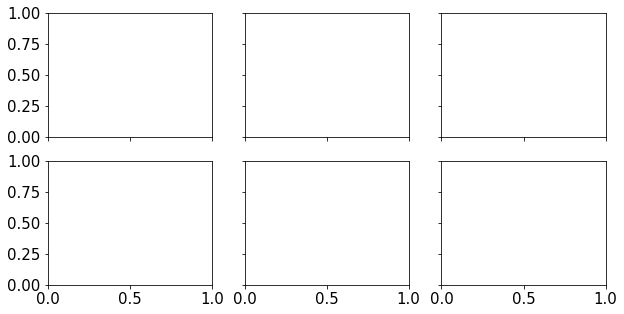

In [50]:
fig, ax = plt.subplots(nrows=2, ncols=3, sharex='col', sharey='row', figsize=(10,5))

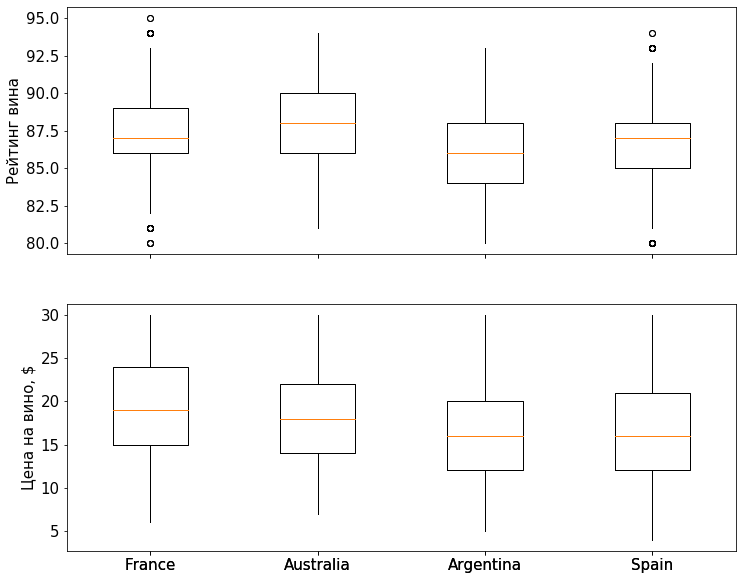

In [51]:
fig, ax = plt.subplots(nrows=2, sharex=True, figsize=(12,10))

ax[0].boxplot([data.points[data.country=='France'],
             data.points[data.country=='Australia'],
             data.points[data.country=='Argentina'],
             data.points[data.country=='Spain']
             ],
            labels=['France', 'Australia', 'Argentina', 'Spain'],
            showcaps=False);
ax[0].set_ylabel('Рейтинг вина')

ax[1].boxplot([data.price[data.country=='France'],
             data.price[data.country=='Australia'],
             data.price[data.country=='Argentina'],
             data.price[data.country=='Spain']
             ],
            labels=['France', 'Australia', 'Argentina', 'Spain'],
            showcaps=False);

ax[1].set_ylabel('Цена на вино, $');

# ax[1].set_title()
# ax[1].set_xlabel()
# ax[1].set_xticks()
# и так далее
# Полный список всего что можно `set_` можно найти тут https://matplotlib.org/3.1.1/api/axes_api.html

# 6. Построим зависимость рейтинг от цены вина

Интересующие нас колонки - `price` и `points`

построим диаграмму рассеяния рейтинг в зависимости от цены.
1. Воспользуйтесь функцией plt.scatter() для того чтобы построить зависимость рейтинга (`points`) от цены (`price`)
    - Когда говорят зависимость A от B это обычно означает что по оси x отложено B а по оси y - A.
2. Увеличьте размеры графика если это необходимо
3. Добавьте на ваш график подписи осей и название
4. Наблюдаете ли вы какую нибудь зависимость рейтинга от цены?

In [52]:
price = data.price
points = data.points

In [53]:
# Решение


### 6.1 Добавим кастомизации

Постройте тот же самый график, но теперь
1. Установите размеры графика (9, 5)
2. Уменьшите размеры отдельных точек, установите параметр s=5
3. Наблюдаете ли вы какую нибудь зависимость рейтинга от цены теперь?

In [54]:
# Решение


### 6.2 Heatmap

Обратите внимание что точки на графике - разного размера, это произошло из-за того что на самом деле вин с некоторыми цена-рейтинг больше 1, поэтому в некоторых точках на самом деле не 1 точка а много (в отдельных случаях несколько сотен!).

Давайте посмотрим а сколько их в каждой точке, для этого воспользуемся функцией pandas.crosstab
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html

In [55]:
points_price = pd.crosstab(data.points, data.price)

In [56]:
points_price

price,4,5,6,7,8,9,10,11,12,13,...,21,22,23,24,25,26,27,28,29,30
points,,,,,,,,,,,,,,,,,,,,,
80,0,1,0,0,9,6,14,6,12,8,...,0,3,1,0,4,1,1,1,0,3
81,0,1,1,3,5,8,19,11,19,7,...,3,4,0,0,4,1,0,0,3,5
82,1,0,0,4,11,21,45,18,32,24,...,6,12,3,10,14,5,5,6,7,12
83,1,2,1,9,16,23,77,46,62,73,...,9,19,10,14,35,9,5,13,5,16
84,1,0,2,9,39,49,134,93,131,129,...,22,36,22,32,46,14,11,23,11,37
85,1,2,5,9,39,48,188,113,197,166,...,26,63,23,58,90,26,18,34,30,71
86,0,0,1,9,24,59,170,98,204,207,...,43,106,56,84,150,46,31,68,43,120
87,0,1,1,6,29,45,133,99,204,172,...,55,157,98,127,274,81,54,130,53,242
88,0,0,2,2,9,14,80,38,126,121,...,66,215,105,161,367,113,74,196,90,288


Функция crosstab создает новую таблицу, такую что в столбцах указана цена (`price`) в строках указан рейтинг (`points`) а на пересечении стоит **количество** вин с такой ценой и рейтингом.

Так например посмотрите на таблицу
вин с ценой 8 долларов и рейтингом 85 ровно 39 штук, а вин с ценой 27 долларов и тем же самым рейтингом - 18.

Доступ к элементам этой новой таблицы можно получать так же как и с любой другой таблицей:
- Чтобы получить доступ к колонке наберите название таблицы и в квадратных скобках название колонки
- Обратите внимание что названия колонок в этой таблице это числа! Это связано с тем что уникальные значения в колонке `price` были числами.


In [57]:
points_price.columns

Int64Index([ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
            21, 22, 23, 24, 25, 26, 27, 28, 29, 30],
           dtype='int64', name='price')

In [58]:
points_price[21]

points
80     0
81     3
82     6
83     9
84    22
85    26
86    43
87    55
88    66
89    54
90    59
91    31
92    19
93     5
94     0
95     0
96     0
Name: 21, dtype: int64

### Imshow example

Пример использования функции imshow

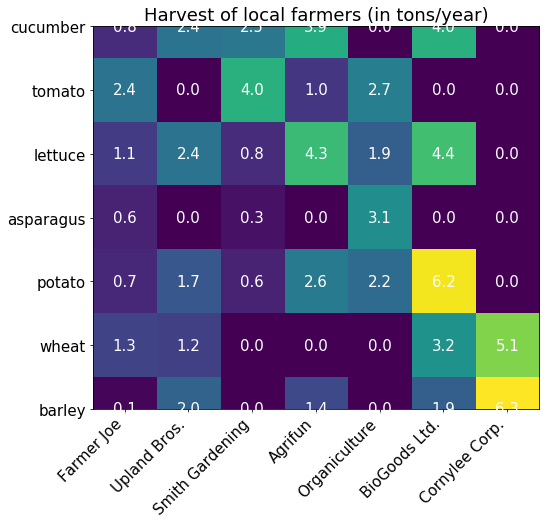

In [59]:
# Create data for example
vegetables = ["cucumber", "tomato", "lettuce", "asparagus",
              "potato", "wheat", "barley"]
farmers = ["Farmer Joe", "Upland Bros.", "Smith Gardening",
           "Agrifun", "Organiculture", "BioGoods Ltd.", "Cornylee Corp."]

harvest = [[0.8, 2.4, 2.5, 3.9, 0.0, 4.0, 0.0],
            [2.4, 0.0, 4.0, 1.0, 2.7, 0.0, 0.0],
            [1.1, 2.4, 0.8, 4.3, 1.9, 4.4, 0.0],
            [0.6, 0.0, 0.3, 0.0, 3.1, 0.0, 0.0],
            [0.7, 1.7, 0.6, 2.6, 2.2, 6.2, 0.0],
            [1.3, 1.2, 0.0, 0.0, 0.0, 3.2, 5.1],
            [0.1, 2.0, 0.0, 1.4, 0.0, 1.9, 6.3]]

# Display harvest using heat map
plt.figure(figsize=(8,8))
plt.imshow(harvest)


# Add numbers into every cell
for i in range(len(vegetables)):
    for j in range(len(farmers)):
        text = plt.text(j, i, harvest[i][j],
                       ha="center", va="center", color="w")
        
# Add x, y ticks  
# Add x, y ticks labels
# Rotate x ticks labels
plt.xticks(range(len(farmers)), farmers, rotation=45, ha="right")
plt.yticks(range(len(vegetables)), vegetables)

# Add title
plt.title("Harvest of local farmers (in tons/year)");

### Ваша очередь

1. Воспользуйтесь функцией `plt.imshow()` для того чтобы построить тепловую карту зависимости рейтинга от цены. Я подготовил для вас необходимую переменную.
2. Увеличьте размеры вашего графика `(15, 7)`
3. Установите параметр `origin='lower'`. По умолчанию на изображениях начало отсчета расположено не в нижнем левом углу, а в верхнем левом углу. Есть идеи почему?
4. Добавьте подписи к осям X и Y
5. Измените значение отсечек по оси Y, на корректные `(80...96)` воспользовавшись функцикей `plt.xticks`, параметр ticks нужно установить равным range(17) (потому что у нас 17 уникальных рейтингов), а параметр labels нужно установить range(80, 97) потому что рейтинг изменяется от 80 до 96.
6. Добавьте к своей тепловой карте colorbar, для этого воспользуйтесь функцией plt.colorbar(). Что она показывает?
7. Измените color map своей тепловой карты, установите параметр cmap='Reds' или выберете любой другой cmap https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
8. Наблюдаете ли вы какую нибудь зависимость рейтинга от цены теперь?

In [60]:
# создадим crosstab еще раз
points_price = pd.crosstab(data.points, data.price).values

In [61]:
# Решение


# 7. Отношение рейтинг/цена в зависимости от страны

Давайте посмотрим соотношения рейтинг-цена в зависимости от страны. Для этого воспользуемся boxplot.

> Соотношение рейтинг/цена означает "сколько очков рейтинга можно получить за 1 единицу цены", значит чем больше эта величина тем лучше. Если бы мы строили график цена-качество (цена-рейтинг) все было бы наоборот "Сколько стоит 1 очко рейтинга" в таком случае было бы меньше - лучше.

1. Постройте boxplot соотношение рейтинг/цена для каждой страны
2. Кастомизируйте его добавьте подписи к осям и название
3. Установите параметр `showfliers=False`
4. Установите параметр `showcaps=False`
5. Увеличьте размеры графика если это необходимо
6. В какой стране наилучшее соотношение рейтинг-цена?

In [62]:
price_country = [data.price[data.country==country] for country in data.country.unique()]
points_country = [data.points[data.country==country] for country in data.country.unique()]

price_points_country = [(points/price) for points, price in zip(points_country, price_country)]

In [63]:
# Решение


### 7.1 Упорядочим боксы

1. Постройте еще один график, на этот раз **упорядочив страны по убыванию** соотношения рейтинг-цена. Можно это сделать вручную как в `п.5`
> Для вашего удобства я создал словарь, в котором ключ - название страны а значение - лист со значениями соотношения рейтинга к цене
2. В какой стране самое выгодное отношение рейтинг к цене?
3. В какой стране самое не выгодное?

In [64]:
price_points_country = dict(zip( data.country.unique(), [(points/price) for points, price in zip(points_country, price_country)]))

In [65]:
# Решение


# 8. В какой стране больше всего областей производит вино?

Нас интересует колонка `province`

1. Нарисуйте количество уникальных `province` в разных странах, воспользуйтесь:
    - bar chart (столбцовая диаграмма), bar или barh
    - pie chart (круговая диаграмма)
2. Оформите свои графики: подписи осей если нужно, название, цвет, размеры графика, подписи к отдельным элементам (размер кругового сектора или размер столбика, в процентах или в абсолютной величине) если посчитате нужным.

In [66]:
# пример, как достать уникальные province для страны

data[data.country=='US'].province.unique()

array(['California', 'Washington', 'Oregon', 'Idaho', 'New York'],
      dtype=object)

In [67]:
# пример, как посчитать количество уникальных province для страны

len(data[data.country=='US'].province.unique())

5

In [68]:
# Решение


# 9. В какой стране больше всего сомелье?

Задание то же что и в `п. 8` только теперь для колонки `taster_name`

In [69]:
data[data.country=='Italy'].taster_name.unique()

array(['Kerin O’Keefe', 'Joe Czerwinski', 'Roger Voss',
       'Michael Schachner', 'Paul Gregutt'], dtype=object)

In [70]:
len(data[data.country=='Italy'].taster_name.unique())

5

In [71]:
# Решение


# 10. Зависимость  количества сортов вин от количества сомелье

Нас интересуют колонки `country`, `taster_name`, `variety`

Для этого воспользуйтесь функцией `plt.scatter()` 
1. Постройте диаграмму рассеяния зависимости количества сортов вин от количества сомелье в каждой стране.
> Для каждой страны посчитайте количество уникальных сомелье, и количество уникальных сортов вина и постройте зависимость числа уникальных сортов вина от числа уникальных сомелье (1 точка - 1 страна).
2. Добавьте подпись к каждой точке исползуя функцию plt.text() в качестве текста должна быть страна (`country`)

In [72]:
num_variety = [len(data[data.country==country].variety.unique()) for country in data.country.unique()]
num_taster = [len(data[data.country==country].taster_name.unique()) for country in data.country.unique()]
countries = data.country.unique()

In [73]:
# Решение


# 11. Зависимость количества сортов вин от числа регионов производства

То же что и `п.10` но теперь зависимость числа уникальных `variety`  от числа уникальных `region_1`

- Что вы можете сказать о разных странах производителях вина? Как много у них разних областей? И как много видов вина они производят?
- На этот раз вместо подписи, используйте легенду. Пример использования легенды см. ниже. В качестве label используйте название страны. На ваше усмотрение раскрасьте разные точки разным цветом.

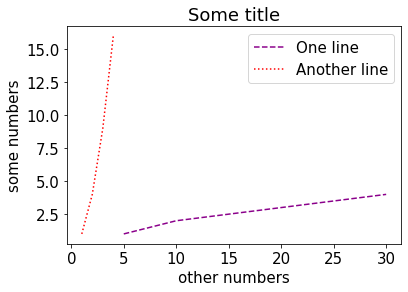

In [74]:
# Пример использования plt.legend()
# обратите внимание, каждый график с уникальным label должен
# быть построен отдельно!

plt.plot([5,10,20, 30], [1, 2, 3, 4],
         color = 'darkmagenta',
         linestyle='--',
         label='One line')

plt.plot([1,2,3, 4,], [1, 4, 9, 16],
         color = 'red',
         linestyle='dotted',
         label='Another line')

plt.legend()
plt.title('Some title')
plt.ylabel('some numbers')
plt.xlabel('other numbers');

In [75]:
num_variety = [len(data[data.country==country].variety.unique()) for country in data.country.unique()]
num_region = [len(data[data.country==country].region_1.unique()) for country in data.country.unique()]
countries = data.country.unique()

In [76]:
# Решение


# 12. Ваш ход

Постройте любые графики которые сможете придумать, используя данные о винах.
Каждые аккуратно оформленных 5 графиков стоят 1 итоговый балл (1 из 10 итоговой оценки), за это задание можно получить не более 2 баллов.


Если вы захотите познакомиться с обработкой табличных данных с использованием библиотеки pandas, я рекомендую вам ознакомиться со списком туториалов:

1. https://www.notion.so/Pandas-Tutorials-Articles-Videos-a19c806a31bb4b288a1909f0803fad5f

Рекомендую начать вот с этих двух
2. https://nbviewer.jupyter.org/github/justmarkham/pandas-videos/blob/master/pandas.ipynb
3. https://github.com/guipsamora/pandas_exercises/
